## Ejercicio 0

Ejecuta el código de la siguiente celda. Asegurate que la carpeta "images" incluye las imágenes proporcionadas. Examina los resultados que se generaron y analiza brevemente el código proporcionado.

Processing image images/4k.jpg
2160 3840
Execution time: 17.493981 seconds


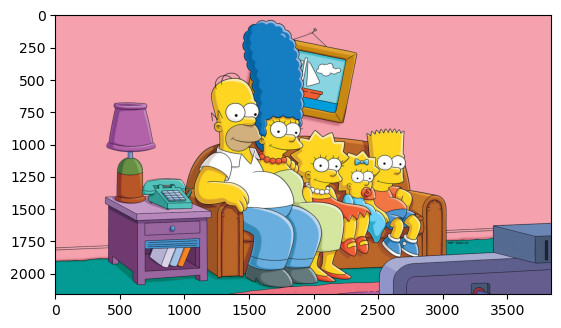

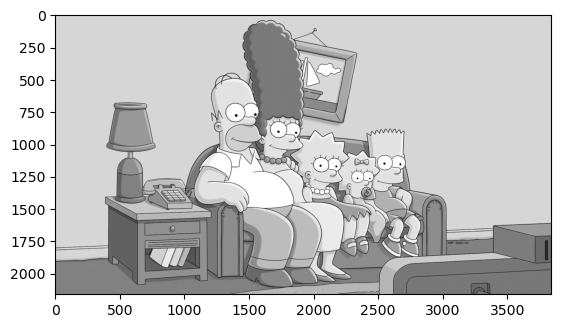

Processing image images/8k.jpg
4320 7680
Execution time: 70.333084 seconds


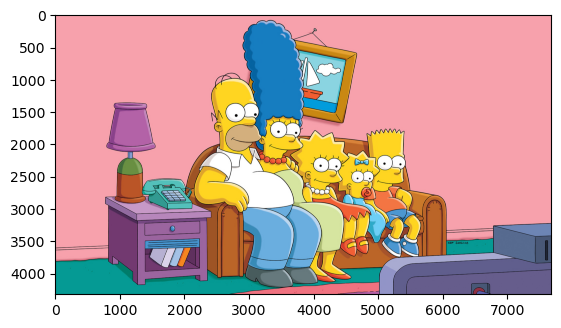

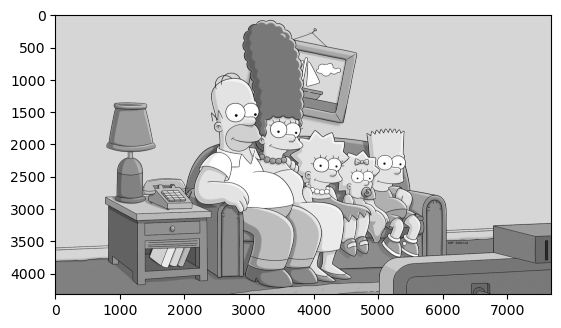

Processing image images/FHD.jpg
1080 1920
Execution time: 4.470029 seconds


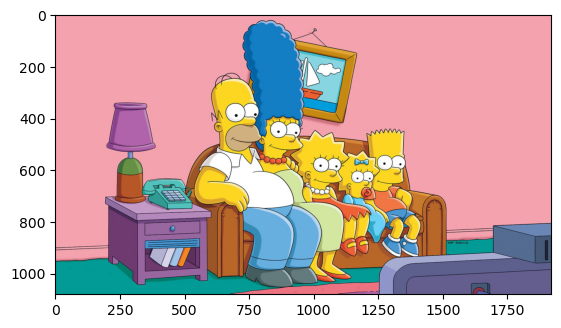

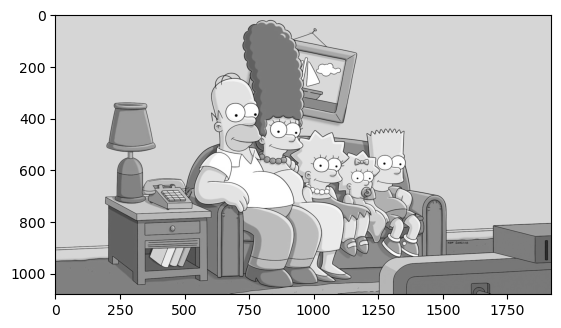

Processing image images/SD.jpg
360 640
Execution time: 0.499803 seconds


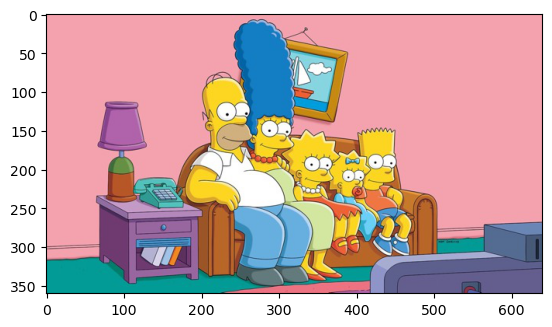

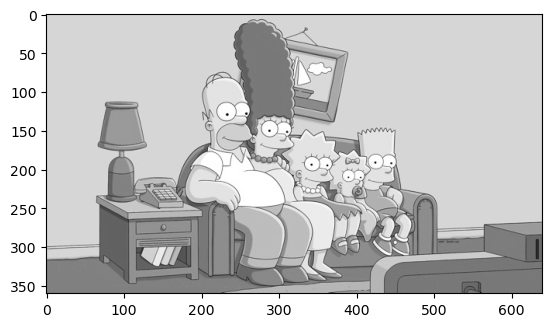

Processing image images/HD.jpg
720 1280
Execution time: 1.977101 seconds


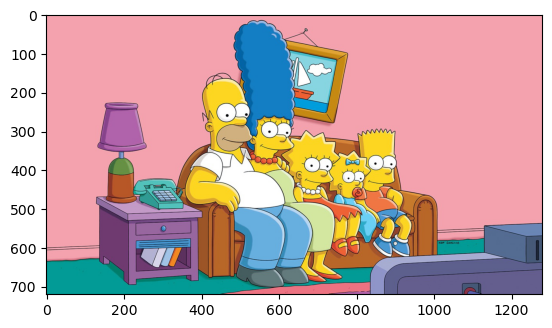

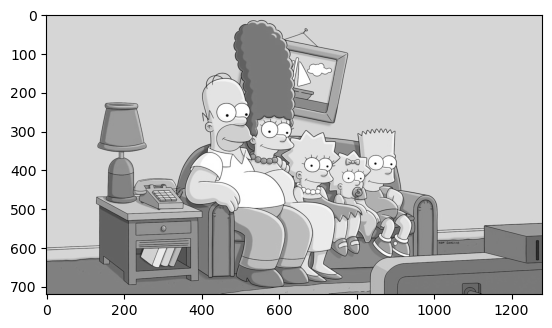

In [37]:
# Código para convertir a gris las imagenes alojadas en la carpeta "images"

import matplotlib
import matplotlib.image as pltim
import matplotlib.pyplot as plt
import numpy as np
import time
import os

folder = "images"  # Asegurar que el link anterior se llamada images

def list_jpg_files(folder_path):
  jpg_files = []
  for filename in os.listdir(folder_path):
    if filename.lower().endswith(".jpg"):
      jpg_files.append(filename)
  return jpg_files

def rgb2gray(image):
  
  imageHeight = len(image)
  imageWidth = len(image[0])
  print(imageHeight, imageWidth)
  greyImage = np.empty((imageHeight, imageWidth), dtype=np.uint8)

  for j in range(imageWidth):
      for i in range(imageHeight):
          greyImage[i][j] = np.int8(image[i][j][0]*0.2989 + image[i][j][1]*0.5870 + image[i][j][2] * 0.1140)
  return greyImage

def showImage(image):
  plt.imshow(image, cmap = matplotlib.cm.Greys_r)
  plt.show()

tiempos_ejecución_ejercicio0 = []

# Obtener la lista de imagenes de la carpeta "folder"
jpg_files_list = list_jpg_files(folder)

# Recorrer la lista para convertir a gris
for image_file in jpg_files_list:
  
  image_file = folder+"/"+image_file
  image = pltim.imread(image_file)
  print(f"Processing image {image_file}")

  start_time = time.time()

  greyimage = rgb2gray(image)

  end_time = time.time()
  execution_time = end_time - start_time
  tiempos_ejecución_ejercicio0.append(execution_time)
  print(f"Execution time: {execution_time:.6f} seconds")

  showImage(image)
  showImage(greyimage)

En este caso se generan 5 pares de imágenes true-color - true-bw, que al ser leidas pixel por pixel, leyendo primero columnas y después filas, tarda mucho tiempo en visualizarlas. En concreto:

- Primera imagen, 4k: 18.34 segundos (0.054 fps). 
- Segunda imagen, 8k: 78.89 segundos (0.012 fps).
- Tercera imagen FHD: 5.26 segundos (0.190 fps).
- Cuarta imagen, SD: 0.52 segundos (1.93 fps). 
- Quinta imagen, HD: 2.09 segundos (0.48 fps). 

Es evidente que este método no es asumible para leer imágenes. En el mejor de los casos, conseguimos 1.93 fps (con la imagen de peor calidad, obviamente). En cuanto busquemos algo de calidad en la imagen, esto sería completamente imposible. 

## Ejercicio 1

Sabemos que el orden de acceso a los datos es importante. Corrija el código si es necesario para mejorar el rendimiento. Explique sus cambios.


Processing image images/4k.jpg
2160 3840
Execution time: 18.356045 seconds


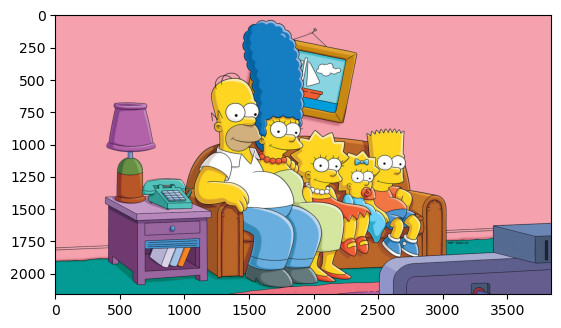

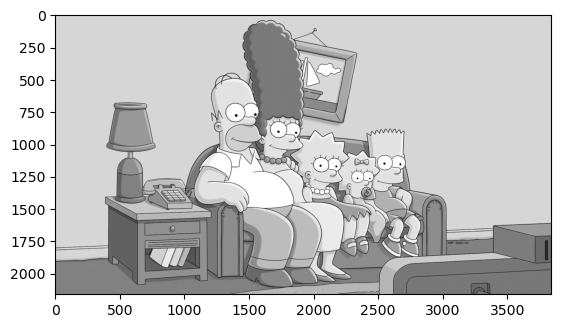

Processing image images/8k.jpg
4320 7680
Execution time: 73.100096 seconds


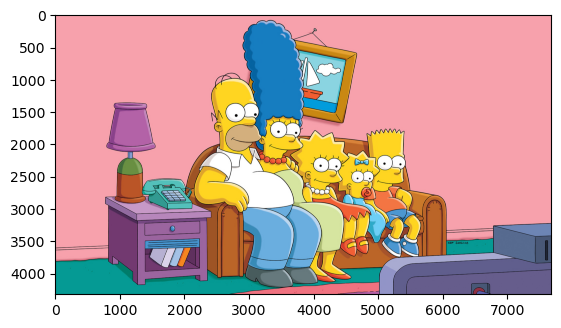

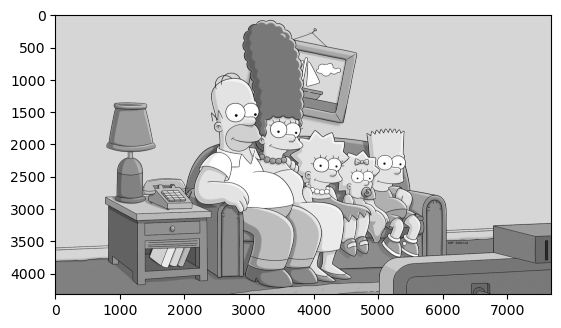

Processing image images/FHD.jpg
1080 1920
Execution time: 4.519580 seconds


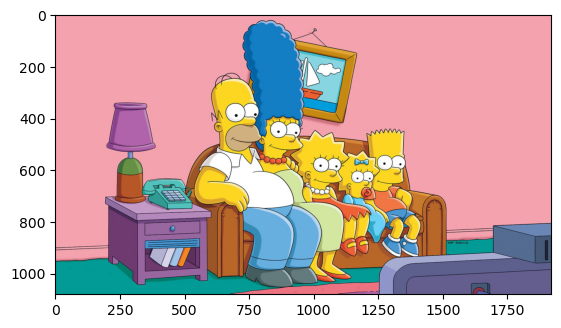

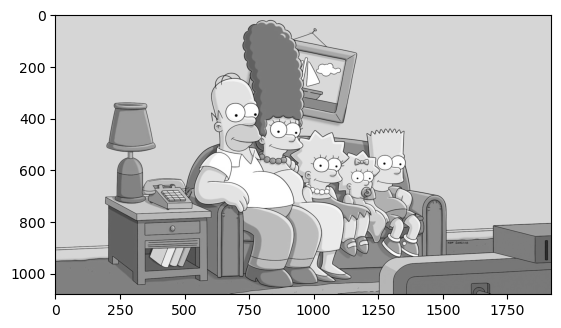

Processing image images/SD.jpg
360 640
Execution time: 0.488306 seconds


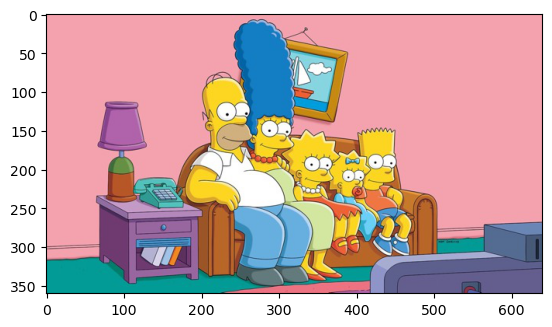

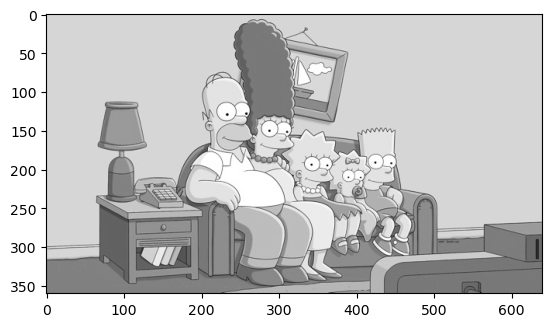

Processing image images/HD.jpg
720 1280
Execution time: 2.013471 seconds


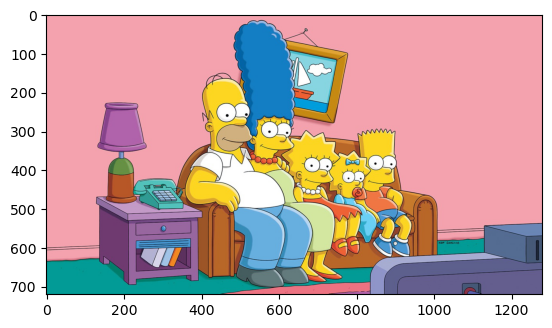

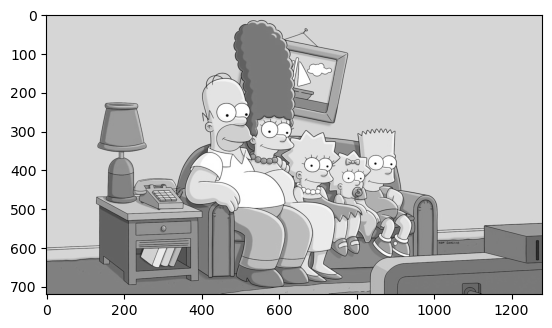

In [38]:
def rgb2gray_ejercicio1(image):
  
  imageHeight = len(image)
  imageWidth = len(image[0])
  print(imageHeight, imageWidth)
  greyImage = np.empty((imageHeight, imageWidth), dtype=np.uint8)
  # Cambiamos el orden: primero filas y luego columnas. 
  for i in range(imageHeight):
      for j in range(imageWidth):
          greyImage[i][j] = np.int8(image[i][j][0]*0.2989 + image[i][j][1]*0.5870 + image[i][j][2] * 0.1140)
  return greyImage

tiempos_ejecución_ejercicio1 = []

# Recorrer la lista para convertir a gris
for image_file in jpg_files_list:
  
  image_file = folder+"/"+image_file
  image = pltim.imread(image_file)
  print(f"Processing image {image_file}")

  start_time = time.time()

  greyimage = rgb2gray_ejercicio1(image)

  end_time = time.time()
  execution_time = end_time - start_time
  tiempos_ejecución_ejercicio1.append(execution_time)
  print(f"Execution time: {execution_time:.6f} seconds")

  showImage(image)
  showImage(greyimage)

En este caso se leen filas y después columnas, pero aún así tarda mucho tiempo en visualizarlas. Esto es debido al rendimiento de Python, probablemente culpable de más del 95% del tiempo de ejecución. En concreto:

- Primera imagen, 4k: 18.71 segundos (0.054 fps fps -> 0.053 fps) -> el rendimiento empeora, aunque es algo que podemos esperar al hacer mediciones experimentales.  
- Segunda imagen, 8k: 76.57 segundos (0.012 fps -> 0.013 fps) -> cierta mejoría, apenas notable o despreciable.  
- Tercera imagen FHD: 4.85 segundos (0.190 fps -> 0.205 fps) -> cierta mejoría, apenas notable. 
- Cuarta imagen, SD: 0.51 segundos (1.93 fps -> 1.93 fps) -> cierta mejoría, apenas notable. 
- Quinta imagen, HD: 2.25 segundos (0.48 fps -> 0.44 fps) -> el rendimiento empeora, aunque es algo que podemos esperar al hacer mediciones experimentales. 

Este método sigue sin ser asumible para leer imágenes. En el mejor de los casos, conseguimos 1.43 fps (con la imagen de peor calidad, obviamente).

## Ejercicio 2

Aplique Numba para la generación de código SIMD. Verifique que se han generado instrucciones SIMD. Complete una tabla con los resultados de tiempo y aceleración para comparar la versión original (con la corrección del ejercicio 1) y la versión SIMD para las imágenes de diferentes resoluciones (SD, HD, FHD, 4k, 8k). Debe incluir una columna con los fps a los que procesaría el programa. Discuta los resultados.

360 640
Processing image images/4k.jpg
2160 3840
Execution time: 0.005667 seconds


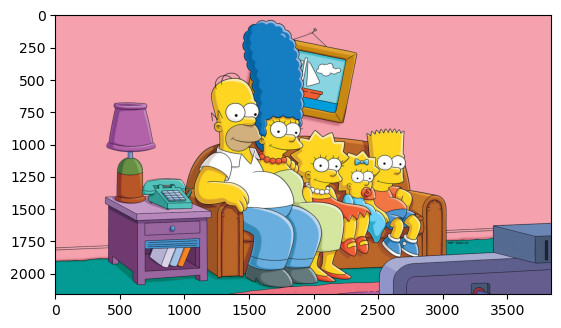

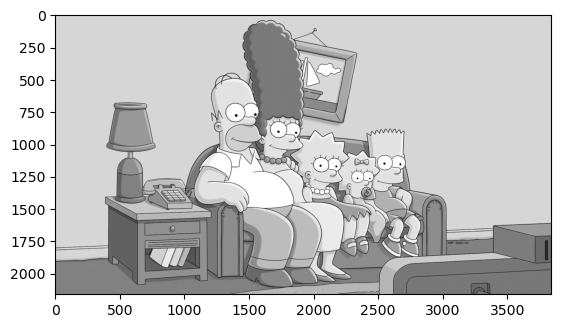

Processing image images/8k.jpg
4320 7680
Execution time: 0.022169 seconds


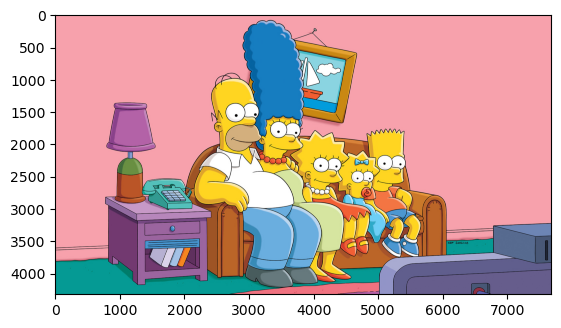

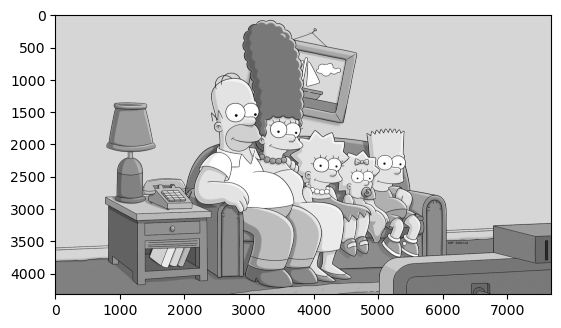

Processing image images/FHD.jpg
1080 1920
Execution time: 0.001731 seconds


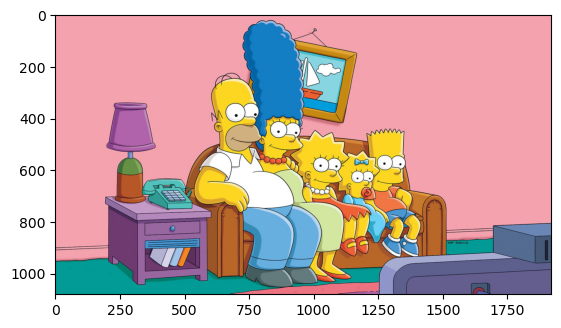

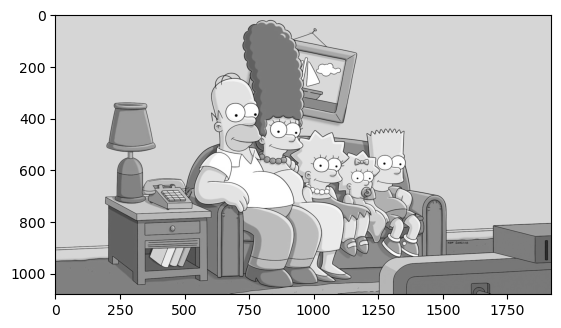

Processing image images/SD.jpg
360 640
Execution time: 0.000489 seconds


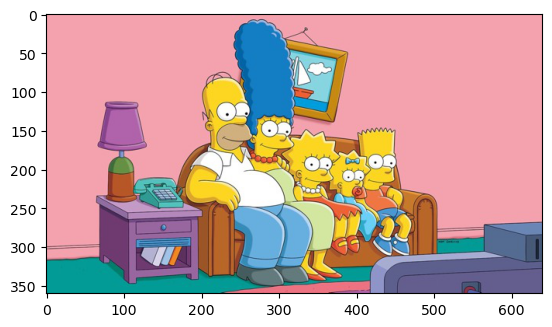

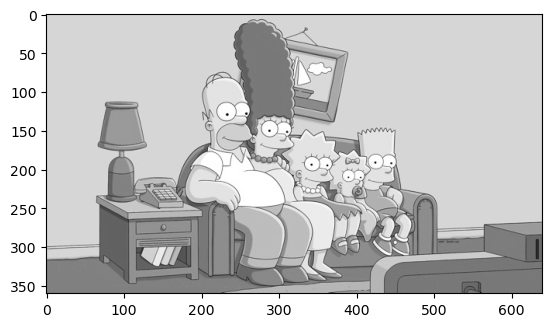

Processing image images/HD.jpg
720 1280
Execution time: 0.000663 seconds


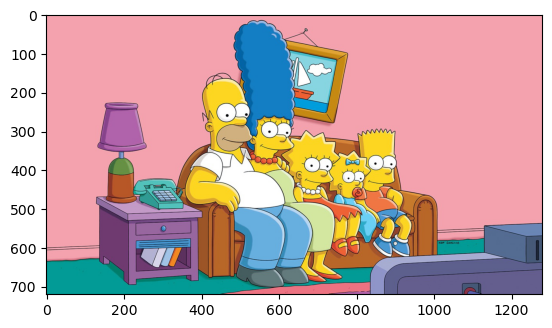

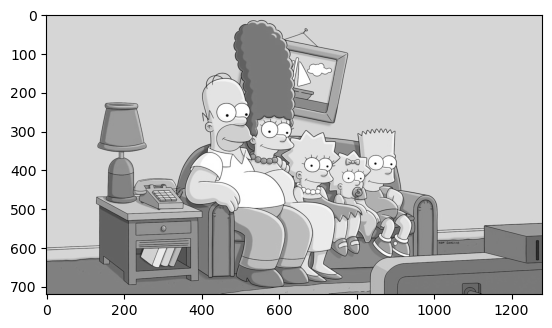

In [39]:
from numba import jit

# Añadimos el decorador de numba para compilar la función. 
@jit(nopython=True)
def rgb2gray_ejercicio2(image):
  imageHeight = len(image)
  imageWidth = len(image[0])
  print(imageHeight, imageWidth)
  greyImage = np.empty((imageHeight, imageWidth), dtype=np.uint8)
  # Y mantenemos el orden de ejecución:
  for i in range(imageHeight):
      for j in range(imageWidth):
          greyImage[i][j] = np.int8(image[i][j][0]*0.2989 + image[i][j][1]*0.5870 + image[i][j][2] * 0.1140)
  return greyImage

tiempos_ejecución_ejercicio2 = []

# Primero una llamdada en frío. 
image = pltim.imread('images/SD.jpg')
rgb2gray_ejercicio2(image)

# Recorrer la lista para convertir a gris
for image_file in jpg_files_list:
  
  image_file = folder+"/"+image_file
  image = pltim.imread(image_file)
  print(f"Processing image {image_file}")

  start_time = time.time()

  greyimage = rgb2gray_ejercicio2(image)

  end_time = time.time()
  execution_time = end_time - start_time
  tiempos_ejecución_ejercicio2.append(execution_time)
  print(f"Execution time: {execution_time:.6f} seconds")

  showImage(image)
  showImage(greyimage)

Podemos ver también si se han generado instrucciones SIMD, lo que demostraría que efectivamente el código se está compilando. Para ello, podemos copiar la función que veíamos en el notebook _simd.ipynb_. 

In [40]:
def find_instr(func, keyword, sig=0, limit=5):
    count = 0
    for l in func.inspect_asm(func.signatures[sig]).split('\n'):
        if keyword in l:
            count += 1
            print(l)
            if count >= limit:
                break
    if count == 0:
        print('No instructions found')

Y comprobar si existe algún tipo de instrucción de este tipo, como la de multiplicación, que sabemos que se tendrá que estar por fuerza si se está resolviendo bien el ejercicio. 

In [41]:
print('float32:')
find_instr(rgb2gray_ejercicio2, keyword='fmul', sig=0) 

float32:
	fmul.2d	v4, v4, v0
	fmul.2d	v5, v5, v0
	fmul.2d	v6, v6, v0
	fmul.2d	v16, v16, v0
	fmul.2d	v18, v18, v0


Efectivamente, existe esta instrucción, lo que indica que el código se está compilando. 

In [42]:
import pandas as pd

# En primer lugar necesitamos añadir cada tipo de imagen como fila. 
# Aprovechamos para añadir los tiempos del ejercicio 0. 

my_dict = {}

imagenes = ['4k', '8k', 'FHD', 'SD', 'HD']
for a, b in zip(imagenes, tiempos_ejecución_ejercicio0):
    my_dict[a] = b 

df = pd.DataFrame.from_dict(my_dict, orient='index', columns=['Tiempo sin orden'])
df['fps_0'] = 1/df['Tiempo sin orden']

# Segunda columna y sus fps asociados:

df['Tiempo con orden'] = tiempos_ejecución_ejercicio1
df['fps_1'] = 1/df['Tiempo con orden']

df['Aceleración al corregir índices (%)'] = np.round(((df['Tiempo sin orden'] / df['Tiempo con orden']) * 100) - 100, 2)

# Tercera columna y sus fps asociados:

df['Tiempo con compilacion'] = tiempos_ejecución_ejercicio2
df['fps_2'] = 1/df['Tiempo con compilacion']

df['Aceleración al compilar (%)'] = np.round(((df['Tiempo con orden'] / df['Tiempo con compilacion']) * 100) - 100, 2)

df

Tiempo sin orden     fps_0  Tiempo con orden     fps_1  \
4k          17.493981  0.057163         18.356045  0.054478   
8k          70.333084  0.014218         73.100096  0.013680   
FHD          4.470029  0.223712          4.519580  0.221260   
SD           0.499803  2.000789          0.488306  2.047895   
HD           1.977101  0.505791          2.013471  0.496655   

     Aceleración al corregir índices (%)  Tiempo con compilacion        fps_2  \
4k                                 -4.70                0.005667   176.468529   
8k                                 -3.79                0.022169    45.108289   
FHD                                -1.10                0.001731   577.727824   
SD                                  2.35                0.000489  2044.007797   
HD                                 -1.81                0.000663  1508.199928   

     Aceleración al compilar (%)  
4k                     323826.43  
8k                     329642.02  
FHD                    261008.71  
SD                      99710.19  
HD                     303571.66

Es evidente que el rendimiento mejora al compilar. Y ni si quiera hemos ejecutado paralelamente. Pero es curioso ver que con este método podríamos leer imágenes a 1097 frames por segundo a HD, una calidad de imagen más que aceptable y una fluidez imperceptible para el humano. Jugando videojuegos cuesta reconocer la diferencia entre 120 y 240 fps. 

## Ejercicio 3

Aplique Numba para generar código paralelo con threads y amplie la tabla de resultados. ¿Cuánto ha mejorado el rendimiento de la aplicación? Discuta los resultados en función del número de cores del entorno de ejecución empleado.

360 640
Processing image images/4k.jpg
2160 3840
Execution time: 0.001230 seconds


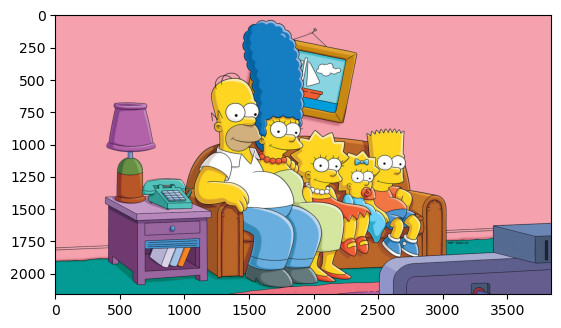

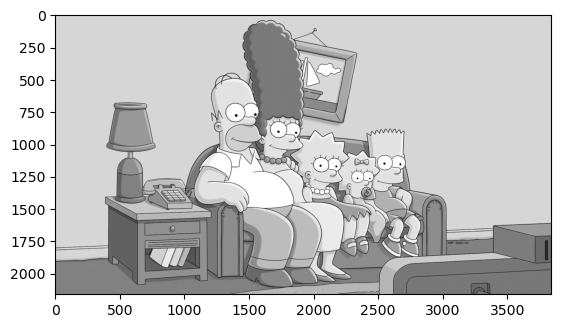

Processing image images/8k.jpg
4320 7680
Execution time: 0.004616 seconds


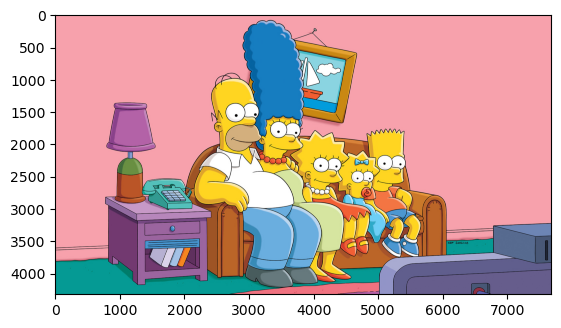

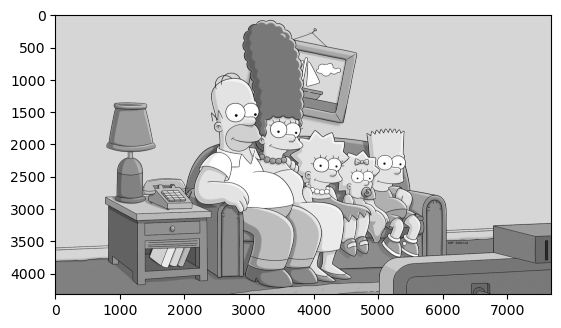

Processing image images/FHD.jpg
1080 1920
Execution time: 0.000738 seconds


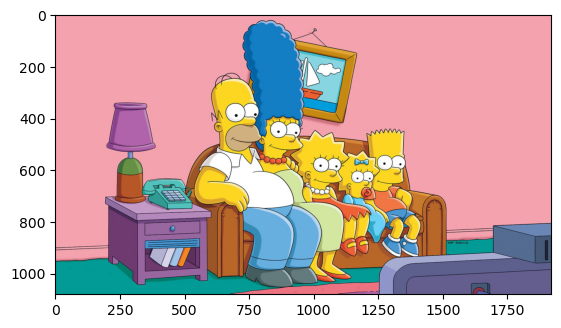

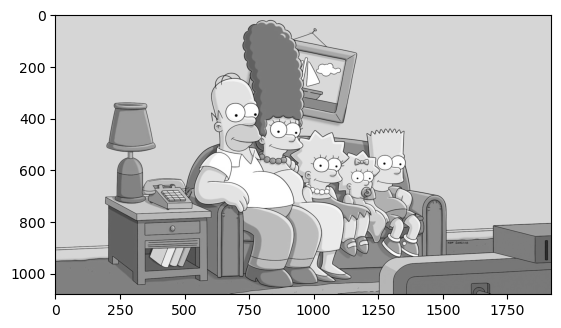

Processing image images/SD.jpg
360 640
Execution time: 0.000567 seconds


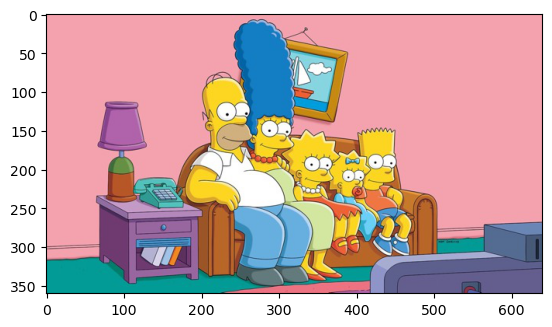

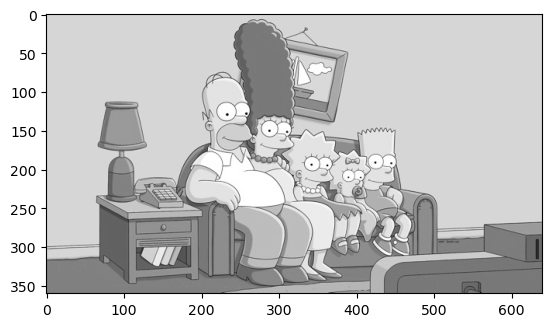

Processing image images/HD.jpg
720 1280
Execution time: 0.000271 seconds


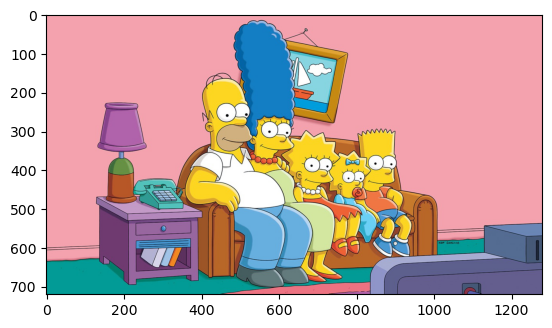

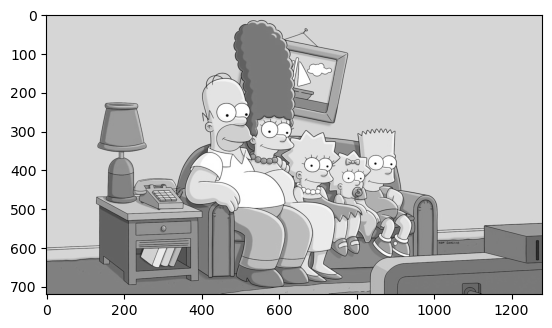

In [43]:
from numba import prange

@jit(nopython=True, parallel=True)
def rgb2gray_ejercicio3(image):
  imageHeight = len(image)
  imageWidth = len(image[0])
  print(imageHeight, imageWidth)
  greyImage = np.empty((imageHeight, imageWidth), dtype=np.uint8)
  # Y mantenemos el orden de ejecución:
  for i in prange(imageHeight):
      for j in range(imageWidth):
          greyImage[i][j] = np.int8(image[i][j][0]*0.2989 + image[i][j][1]*0.5870 + image[i][j][2] * 0.1140)
  return greyImage

tiempos_ejecución_ejercicio3 = []

# Primero una llamdada en frío. 
image = pltim.imread('images/SD.jpg')
rgb2gray_ejercicio3(image)

# Recorrer la lista para convertir a gris
for image_file in jpg_files_list:
  
  image_file = folder+"/"+image_file
  image = pltim.imread(image_file)
  print(f"Processing image {image_file}")

  start_time = time.time()

  greyimage = rgb2gray_ejercicio3(image)

  end_time = time.time()
  execution_time = end_time - start_time
  tiempos_ejecución_ejercicio3.append(execution_time)
  print(f"Execution time: {execution_time:.6f} seconds")

  showImage(image)
  showImage(greyimage)

In [44]:
df['Tiempo con paralelización'] = tiempos_ejecución_ejercicio3
df['fps_3'] = 1/df['Tiempo con paralelización']

df['Aceleración al paralelizar (%)'] = np.round(((df['Tiempo con compilacion'] / df['Tiempo con paralelización']) * 100) - 100, 2)

df

Tiempo sin orden     fps_0  Tiempo con orden     fps_1  \
4k          17.493981  0.057163         18.356045  0.054478   
8k          70.333084  0.014218         73.100096  0.013680   
FHD          4.470029  0.223712          4.519580  0.221260   
SD           0.499803  2.000789          0.488306  2.047895   
HD           1.977101  0.505791          2.013471  0.496655   

     Aceleración al corregir índices (%)  Tiempo con compilacion        fps_2  \
4k                                 -4.70                0.005667   176.468529   
8k                                 -3.79                0.022169    45.108289   
FHD                                -1.10                0.001731   577.727824   
SD                                  2.35                0.000489  2044.007797   
HD                                 -1.81                0.000663  1508.199928   

     Aceleración al compilar (%)  Tiempo con paralelización        fps_3  \
4k                     323826.43                   0.001230   813.164793   
8k                     329642.02                   0.004616   216.636744   
FHD                    261008.71                   0.000738  1355.625081   
SD                      99710.19                   0.000567  1764.536811   
HD                     303571.66                   0.000271  3688.921724   

     Aceleración al paralelizar (%)  
4k                           360.80  
8k                           380.26  
FHD                          134.65  
SD                           -13.67  
HD                           144.59

Es obvio que, en función de la máquina desde la que se ejecute este código, la tabla final de pandas (la que se muestra justo encima), puede ser muy diferente. Por ello, hemos probado a ejecutar todas las celdas desde 0 desde nuestras dos máquinas. Hemos guardado los resultados aquí:

Resultados en Mac M4 (10 cores):

- La aceleración resultado de paralelizar en este caso oscila entre el 150% y el 400% en el mejor de los casos. Lo lógico sería pensar que el rendimiento al pasar de 1 core a 10 cores es x10, pero eso no ocurre ni en el mejor de los casos. Normalmente esto se debe a que el problema no es absolutamente paralelizable. Se "pierde" el tiempo en otras subtareas, como puede ser la creación de los hilos (a nivel sistema operativo), la lectura de la imagen (siempre tarda un tiempo fijo) o la medición de los tiempos. Todas esas subtareas consumen recursos y solo pueden ser ejecutadas desde un procesador (a priori). 